In [13]:
import os
import pandas as pd

SN_path = os.path.join("/", "home", "romainc", "Desktop", "2021AB", "SRDEF")

with open(SN_path, "r") as f:
    all_df = pd.read_csv(f, delimiter='|', header=None)

all_df.dropna(how='all', axis=1, inplace=True)
all_df.columns = ["Record Type", "UI", "Name", "Tree Number", "Definition", "Usage Notes", "NH", "Abbreviation", "Inverse"]

rel_df = all_df.loc[all_df["Record Type"] == "RL"]

tree_nodes = list(rel_df["Tree Number"].apply(lambda x: x.split(".")).values)
rel_df["Tree Ids"] = tree_nodes

tree_nodes = sorted(tree_nodes)
good_nodes = []

for elem in tree_nodes:
    if elem[0] == 'R' or elem[0] == 'H':
        good_nodes.append(elem)
    elif len(elem) == 1:
        continue
    else:
        if (elem[0] == 'R3' and int(elem[1]) < 5) or (elem[0] == 'R5' and elem[1] == '3'):
            if len(elem) == 2:
                continue
            else:
                good_nodes.append(elem)
        else:
            good_nodes.append(elem)
keep = rel_df["Tree Ids"].apply(lambda x: x in good_nodes)

good_rel_df = rel_df.loc[keep].drop("Tree Ids", axis=1).reset_index(drop=True)
print(good_rel_df["Name"])

0                   part_of
1                  contains
2               location_of
3            co-occurs_with
4                  precedes
5                process_of
6               carries_out
7            interacts_with
8                 practices
9                  produces
10                 exhibits
11                 disrupts
12                   causes
13                 prevents
14              complicates
15         manifestation_of
16                  manages
17                   treats
18                     uses
19                indicates
20                result_of
21              property_of
22       conceptual_part_of
23            evaluation_of
24                 measures
25                diagnoses
26       assesses_effect_of
27                 issue_in
28          associated_with
29              consists_of
30              adjacent_to
31             connected_to
32            interconnects
33                surrounds
34                traverses
35            deriva

/tmp/ipykernel_21977/1018095476.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df["Tree Ids"] = tree_nodes


In [18]:
with open(os.path.join(ROOT_PATH, "src", "relations_full.csv"), "r") as f:
    relations_full_df = pd.read_csv(f).drop("Unnamed: 0", axis=1)

In [36]:
rel_df

,Record Type,UI,Name,Tree Number,Definition,Usage Notes,NH,Abbreviation,Inverse,Tree Ids
127,RL,T132,physically_related_to,R1,Related by virtue of some physical attribute o...,NaN,NaN,PR,physically_related_to,[R1]
128,RL,T133,part_of,R1.1,"Composes, with one or more other physical unit...",NaN,NaN,PT,has_part,"[R1, 1]"
129,RL,T134,contains,R1.3,Holds or is the receptacle for fluids or other...,NaN,NaN,CT,contained_in,"[R1, 3]"
130,RL,T135,location_of,R2.1,"The position, site, or region of an entity or ...",NaN,NaN,LO,has_location,"[R2, 1]"
131,RL,T136,temporally_related_to,R4,"Related in time by preceding, co-occuring with...",NaN,NaN,TR,temporally_related_to,[R4]
132,RL,T137,co-occurs_with,R4.1,"Occurs at the same time as, together with, or ...",NaN,NaN,CW,co-occurs_with,"[R4, 1]"
133,RL,T138,precedes,R4.2,Occurs earlier in time. This includes antedate...,NaN,NaN,PC,follows,"[R4, 2]"
134,RL,T139,functionally_related_to,R3,Related by the carrying out of some function o...,NaN,NaN,FR,functionally_related_to,[R3]
135,RL,T140,process_of,R3.4.1,"Action, function, or state of.",NaN,NaN,PO,has_process,"[R3, 4, 1]"
136,RL,T141,carries_out,R3.3.1,Executes a function or performs a procedure or...,NaN,NaN,CO,carried_out_by,"[R3, 3, 1]"


In [39]:
rel_df[["Name", "Tree Number"]].reset_index(drop=True)

,Name,Tree Number
0,physically_related_to,R1
1,part_of,R1.1
2,contains,R1.3
3,location_of,R2.1
4,temporally_related_to,R4
5,co-occurs_with,R4.1
6,precedes,R4.2
7,functionally_related_to,R3
8,process_of,R3.4.1
9,carries_out,R3.3.1


In [28]:
sum(is_useful)

1

In [7]:
import pandas as pd

old_xp = [
    250,
    655,
    1265,
    2085,
    3240,
    4125,
    4785,
    5865,
    7275,
    8205,
    9365,
    10715,
    12085,
    13455,
    14810,
    16135,
    17415,
    18635,
    19775,
    20825,
    22295,
    23745,
    25170,
    26550,
    27885,
    30140,
    32480,
    34910,
    37425,
    40675,
    44100,
    47705,
    51490,
    55460,
    59625,
    63985,
    68545,
    73305,
    78280,
    83460,
    88860,
    94485,
    100330,
    106405,
    112715,
    119265,
    129995,
    139665,
    154075,
    194030,
    212870,
    225770,
    240255,
    255180,
    272795,
    291495,
    311490,
    332165,
    353410
]

new_xp = [
    250,
    595,
    1085,
    1715,
    2485,
    3405, 
    4460, 
    5660,
    7005,
    8490,
    9765,
    11015,
    12325,
    13705,
    15145,
    16645,
    18215,
    19845,
    21540,
    23300,
    25125,
    27010,
    28960,
    30975,
    33055,
    35195,
    37400,
    39670,
    42005,
    45370,
    45855,
    46275,
    46635,
    46925,
    47155,
    47320,
    47425,
    47460,
    47435,
    47345,
    47190,
    46975,
    46695,
    46350,
    45940,
    45465,
    44930,
    44330,
    43665,
    42940,
    47845,
    52905,
    58125,
    63505,
    69040,
    74730,
    80580,
    86590,
    92755,
    170680,
    205795,
    242940,
    282165,
    323515,
    367035,
    412775,
    460785,
    511105,
    563785
]

In [17]:
sum(new_xp[-10:])

3540580

In [27]:
old_xp_acc = []
cur = 0
for x in old_xp:
    cur += x
    old_xp_acc.append(cur)

new_xp_acc = []
cur = 0
for x in new_xp:
    cur += x
    new_xp_acc.append(cur)
    
old_xp_acc = np.array(old_xp_acc)
new_xp_acc = np.array(new_xp_acc)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

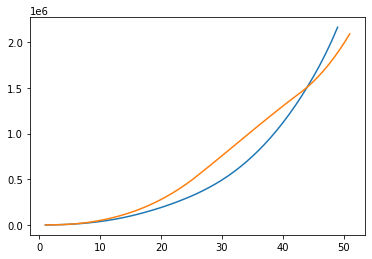

In [40]:
plt.plot(range(1, len(old_xp[:49]) + 1), old_xp_acc[:49])
plt.plot(np.linspace(1, 51, 59), new_xp_acc[:59])
plt.show()

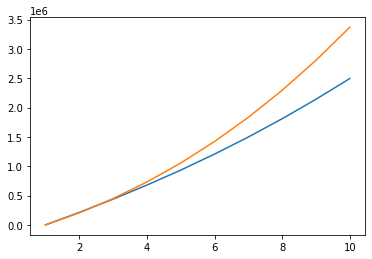

In [38]:
plt.plot(range(1, 11), old_xp_acc[-10:] - old_xp_acc[49])
plt.plot(range(1, 11), new_xp_acc[-10:] - new_xp_acc[59])
plt.show()

In [37]:
len(old_xp_acc)

59

In [35]:
new_xp_acc[-1]

5632380